In [1]:
import pandas as pd
import math

def entropy(data):
    le=len(data)
    cou=data['label'].value_counts()
    ent=0
    for val in cou:
        ent-=(val/le)*math.log2(val/le)
    return ent
        

def info_gain(data,cols):
    attr=data[cols].unique()
    tot=len(data)
    ig=entropy(data)
    for i in attr:
        subset=data[data[cols]==i]
        ent=entropy(subset)
        le=len(subset)
        ig-=(le/tot)*ent
    return ig


def get_best(data,attr):
    information_g={}
    for i in attr:
        information_g[i]=info_gain(data,i)
    return max(information_g,key=information_g.get) # type:ignore

def create_tree(data,att,target):
    if len(data['label'].unique())==1:
        return data['label'].iloc[0]
    if (len(att)==0):
        return data['label'].value_counts().idxmax()
    best_aatr=get_best(data,att)
    # print(best_aatr)
    tree={best_aatr:{}}
    remain=[i for i in att if i!=best_aatr]

    for i in data[best_aatr].unique():
        subset=data[data[best_aatr]==i]
        subset=subset.drop(best_aatr,axis=1)
        subtree=create_tree(subset,remain,target)
        tree[best_aatr][i]=subtree
    return tree

data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'label': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

attributes = list(df.columns)
attributes.remove('label')

# Build the decision tree
decision_tree = create_tree(df, attributes, 'label')

print(decision_tree)

{'Outlook': {'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}, 'Overcast': 'Yes', 'Rainy': {'Wind': {'Weak': 'Yes', 'Strong': 'No'}}}}


In [33]:
import numpy as np

inp_neu=np.array([[2,9],[1,5],[3,6]],dtype=float)

out_neu=np.array([[92],[86],[89]],dtype=float)

inp_neu=inp_neu/np.amax(inp_neu,axis=0)
out_neu=out_neu/np.amax(out_neu,axis=0)

epochs=5000
inp=2
hid=3
out=1
lr=0.1
hid_wei=np.random.uniform(size=(inp,hid))
hid_bia=np.random.uniform(size=(1,hid))
out_wei=np.random.uniform(size=(hid,out))
out_bia=np.random.uniform(size=(1,out))

def sigmoid(x):
    return 1/(1+np.exp(-x))
def sig_der(x):
    return x*(1-x)

for i in range(epochs):
    # front
    hid_inp=np.dot(inp_neu,hid_wei)+hid_bia
    hid_out=sigmoid(hid_inp)
    out_in=np.dot(hid_out,out_wei)+out_bia
    out_out=sigmoid(out_in)

    #back
    out_err=out_neu-out_out
    out_grad=sig_der(out_out)*out_err
    hid_err=out_grad.dot(out_wei.T)
    hid_grad=sig_der(hid_out)*hid_err

    #weight
    out_wei+=hid_out.T.dot(out_grad)*lr
    out_bia+=np.sum(out_grad,axis=0,keepdims=True)*lr
    hid_wei+=inp_neu.T.dot(hid_grad)*lr
    hid_bia+=np.sum(hid_grad,axis=0,keepdims=True)*lr

print(out_neu)
print(out_out)

[[1.        ]
 [0.93478261]
 [0.9673913 ]]
[[0.96844211]
 [0.96154837]
 [0.96814051]]


In [38]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

iris=datasets.load_iris()

x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.1) # type: ignore

model=KNeighborsClassifier(1)

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

for i in range(len(x_test)):
    print(y_test[i],'  ',y_pred[i])
print(model.score(x_test,y_test))

0    0
2    2
1    1
2    2
0    0
1    1
0    0
0    0
1    1
2    2
2    2
1    1
0    0
2    2
1    1
1.0


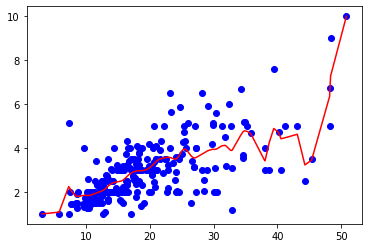

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def kernel(point,xmat,k):
    m,n=np.shape(xmat)
    res=np.mat(np.eye(m))

    for i in range(m):
        diff=point-X[i]
        res[i,i]=np.exp((diff*diff.T)/(-2*k**2))
    return res

def localweight(point,xmat,ymat,k):
    wt=kernel(point,xmat,k)
    return ((X.T*(wt*X)).I)*(X.T*wt*ymat.T) # type: ignore

def localweightregression(xmat,ymat,k):
    m,n=np.shape(xmat)
    ypred=np.zeros(m)
    for i in range(m):
        ypred[i]=xmat[i]*localweight(xmat[i],xmat,ymat,k)
    return ypred

df=pd.read_csv('C:\\Users\\Admin\\Downloads\\10-dataset.csv')

A=df.total_bill
B=df.tip

mcola=np.mat(A)
mcolb=np.mat(B)

m=np.shape(mcolb)[1]
ones=np.ones((1,m),dtype=int)

X=np.hstack((ones.T,mcola.T))

ypred=localweightregression(X,mcolb,0.8)


sortx=X.copy()
sortx.sort(axis=0)
plt.scatter(A,B,color='blue')
plt.plot(sortx[:,1],ypred[X[:,1].argsort(0)],color='red')
plt.show()